In [1]:
import geopandas as gpd
import pandas as pd
import os
from shapely.geometry import MultiPoint
import contextily
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

C:\Users\Kacper Kozaczko\AppData\Local\Temp\ipykernel_5904\1074250388.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
data_dir = os.path.join(os.getcwd(), "..", "..", "preprocessing", "nyc_bike", "data")
df_2013 = pd.read_parquet(
    os.path.join(data_dir, "nyc_bike_2013.parquet")
)  # local version

In [3]:
"""
data_loaded = load_dataset("kraina/nyc_bike", name="nyc_bike_2013")
df_2013 = data_loaded["train"].to_pandas()
"""

'\ndata_loaded = load_dataset("kraina/nyc_bike", name="nyc_bike_2013")\ndf_2013 = data_loaded["train"].to_pandas()\n'

In [4]:
df_2013.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,391,2013-09-30 07:41:55,2013-09-30 07:48:26,438,St Marks Pl & 1 Ave,40.727791,-73.985649,497,E 17 St & Broadway,40.737050,-73.990093,20255,Subscriber,1979,1
1,570,2013-09-30 07:41:56,2013-09-30 07:51:26,453,W 22 St & 8 Ave,40.744751,-73.999154,368,Carmine St & 6 Ave,40.730386,-74.002150,19000,Subscriber,1955,2
2,1043,2013-09-30 07:41:56,2013-09-30 07:59:19,388,W 26 St & 10 Ave,40.749718,-74.002950,456,E 53 St & Madison Ave,40.759711,-73.974023,15311,Subscriber,1972,1
3,304,2013-09-30 07:41:59,2013-09-30 07:47:03,336,Sullivan St & Washington Sq,40.730477,-73.999061,382,University Pl & E 14 St,40.734927,-73.992005,19305,Subscriber,1964,1
4,368,2013-09-30 07:42:00,2013-09-30 07:48:08,248,Laight St & Hudson St,40.721854,-74.007718,327,Vesey Pl & River Terrace,40.715338,-74.016584,17882,Subscriber,1971,1


In [5]:
start_geometry = gpd.points_from_xy(
    x=df_2013["start station longitude"], y=df_2013["start station latitude"]
)
end_geometry = gpd.points_from_xy(
    x=df_2013["end station longitude"], y=df_2013["end station latitude"]
)

# start_end_points = [LineString([start, end]) for start, end in zip(start_geometry, end_geometry)]
multi_point_geometries = [
    MultiPoint([start, end]) for start, end in zip(start_geometry, end_geometry)
]

In [6]:
gdf_2013 = gpd.GeoDataFrame(
    df_2013.drop(
        [
            "start station latitude",
            "start station longitude",
            "end station latitude",
            "end station longitude",
        ],
        axis=1,
    ),
    geometry=multi_point_geometries,
    crs="EPSG:4326",
)

In [7]:
gdf_2013.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,geometry
0,391,2013-09-30 07:41:55,2013-09-30 07:48:26,438,St Marks Pl & 1 Ave,497,E 17 St & Broadway,20255,Subscriber,1979,1,"MULTIPOINT (-73.98565 40.72779, -73.99009 40.7..."
1,570,2013-09-30 07:41:56,2013-09-30 07:51:26,453,W 22 St & 8 Ave,368,Carmine St & 6 Ave,19000,Subscriber,1955,2,"MULTIPOINT (-73.99915 40.74475, -74.00215 40.7..."
2,1043,2013-09-30 07:41:56,2013-09-30 07:59:19,388,W 26 St & 10 Ave,456,E 53 St & Madison Ave,15311,Subscriber,1972,1,"MULTIPOINT (-74.00295 40.74972, -73.97402 40.7..."
3,304,2013-09-30 07:41:59,2013-09-30 07:47:03,336,Sullivan St & Washington Sq,382,University Pl & E 14 St,19305,Subscriber,1964,1,"MULTIPOINT (-73.99906 40.73048, -73.99201 40.7..."
4,368,2013-09-30 07:42:00,2013-09-30 07:48:08,248,Laight St & Hudson St,327,Vesey Pl & River Terrace,17882,Subscriber,1971,1,"MULTIPOINT (-74.00772 40.72185, -74.01658 40.7..."


In [8]:
gdf_2013.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34359 entries, 0 to 34358
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tripduration        34359 non-null  int64   
 1   starttime           34359 non-null  object  
 2   stoptime            34359 non-null  object  
 3   start station id    34359 non-null  int64   
 4   start station name  34359 non-null  object  
 5   end station id      34359 non-null  int64   
 6   end station name    34359 non-null  object  
 7   bikeid              34359 non-null  int64   
 8   usertype            34359 non-null  object  
 9   birth year          34359 non-null  object  
 10  gender              34359 non-null  int64   
 11  geometry            34359 non-null  geometry
dtypes: geometry(1), int64(5), object(6)
memory usage: 3.1+ MB


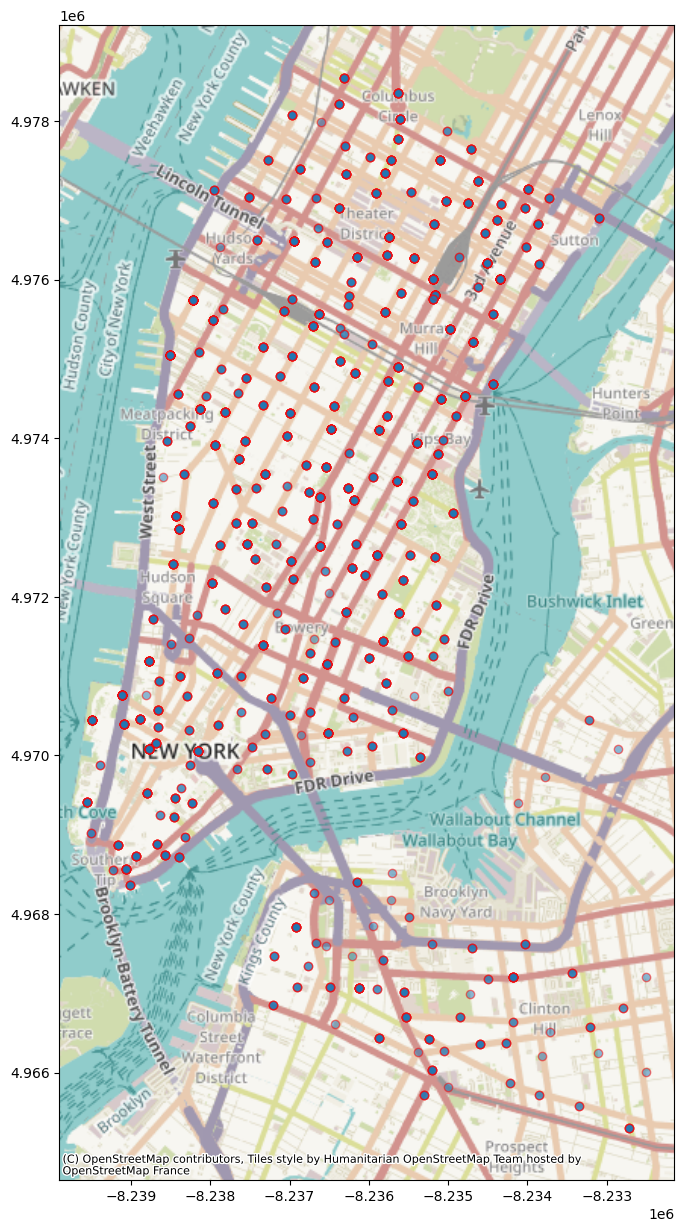

In [9]:
neigh_wm = gdf_2013.iloc[:1000].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, edgecolor="r")
contextily.add_basemap(ax, zoom=13)

plt.show()

# Postprocessing of years 2013-2020 

In [10]:
save_files_gdf = (
    False  # change it if you want to save GeoDataFrame in your data directory
)

In [11]:
years_previous = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
years_current = [2021, 2022, 2023]

In [12]:
def make_geodataframe_previous(dataframe: pd.DataFrame) -> gpd.GeoDataFrame:
    start_station_geometry = gpd.points_from_xy(
        x=dataframe["start station longitude"], y=dataframe["start station latitude"]
    )
    end_station_geometry = gpd.points_from_xy(
        x=dataframe["end station longitude"], y=dataframe["end station latitude"]
    )
    multi_point_stations_geometries = [
        MultiPoint([start, end])
        for start, end in zip(start_station_geometry, end_station_geometry)
    ]
    gdf = gpd.GeoDataFrame(
        dataframe.drop(
            [
                "start station latitude",
                "start station longitude",
                "end station latitude",
                "end station longitude",
            ],
            axis=1,
        ),
        geometry=multi_point_stations_geometries,
        crs="EPSG:4326",
    )

    return gdf

In [13]:
def make_geodataframe_current(dataframe: pd.DataFrame) -> gpd.GeoDataFrame:
    start_station_geometry = gpd.points_from_xy(
        x=dataframe["start_lng"], y=dataframe["start_lat"]
    )
    end_station_geometry = gpd.points_from_xy(
        x=dataframe["end_lng"], y=dataframe["end_lat"]
    )
    multi_point_stations_geometries = [
        MultiPoint([start, end])
        for start, end in zip(start_station_geometry, end_station_geometry)
    ]
    gdf = gpd.GeoDataFrame(
        dataframe.drop(
            [
                "start_lng",
                "start_lat",
                "end_lng",
                "end_lat",
            ],
            axis=1,
        ),
        geometry=multi_point_stations_geometries,
        crs="EPSG:4326",
    )

    return gdf

In [14]:
# local version
nyc_bikes_files_previous = [
    os.path.join(data_dir, str(file))
    for file in os.listdir(data_dir)
    if (
        "nyc_bike_" in file
        and file.endswith(".parquet")
        and file[9:13] in [str(year) for year in years_previous]
    )
]
nyc_bikes_files_current = [
    os.path.join(data_dir, str(file))
    for file in os.listdir(data_dir)
    if (
        "nyc_bike_" in file
        and file.endswith(".parquet")
        and file[9:13] in [str(year) for year in years_current]
    )
]

In [15]:
for file in tqdm(
    nyc_bikes_files_previous,
    desc="Geodataframe transforming",
    colour="green",
):
    gdf = make_geodataframe_previous(pd.read_parquet(file))
    if save_files_gdf:
        gdf.to_parquet(os.path.join(data_dir, f"nyc_bike_gdf_{file[-12:]}"))

Geodataframe transforming:   0%|          | 0/8 [00:00<?, ?it/s]

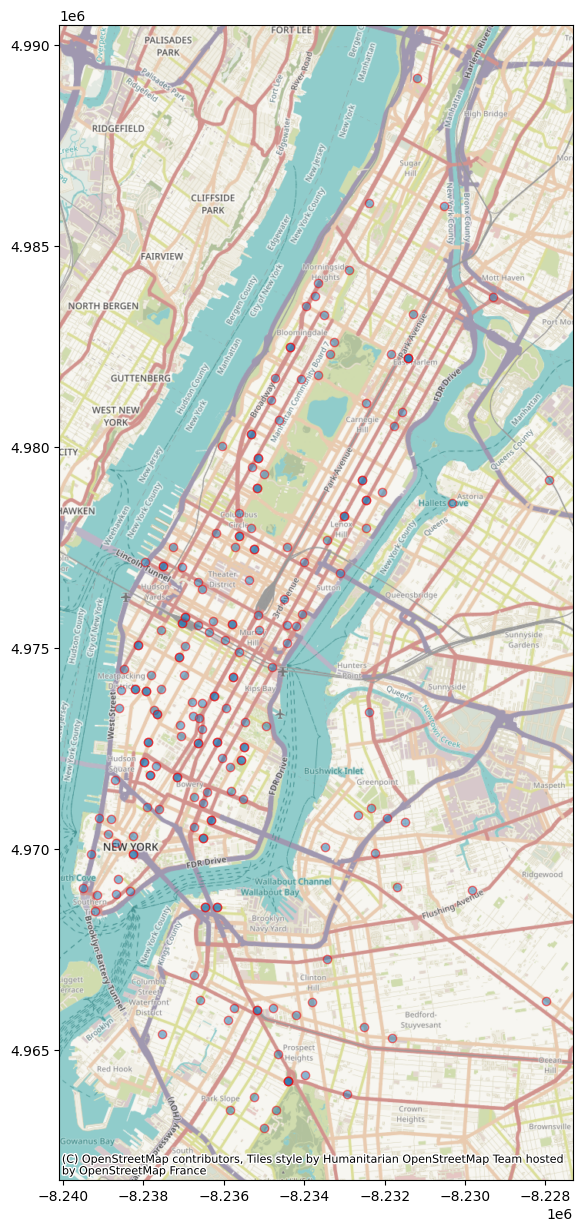

In [16]:
neigh_wm = gdf.iloc[:100].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, edgecolor="r")
contextily.add_basemap(ax, zoom=13)
plt.show()

In [17]:
for file in tqdm(
    nyc_bikes_files_current,
    desc="Geodataframe transforming",
    colour="green",
):
    gdf = make_geodataframe_current(pd.read_parquet(file))
    if save_files_gdf:
        gdf.to_parquet(os.path.join(data_dir, f"nyc_bike_gdf_{file[-12:]}"))

Geodataframe transforming:   0%|          | 0/3 [00:00<?, ?it/s]

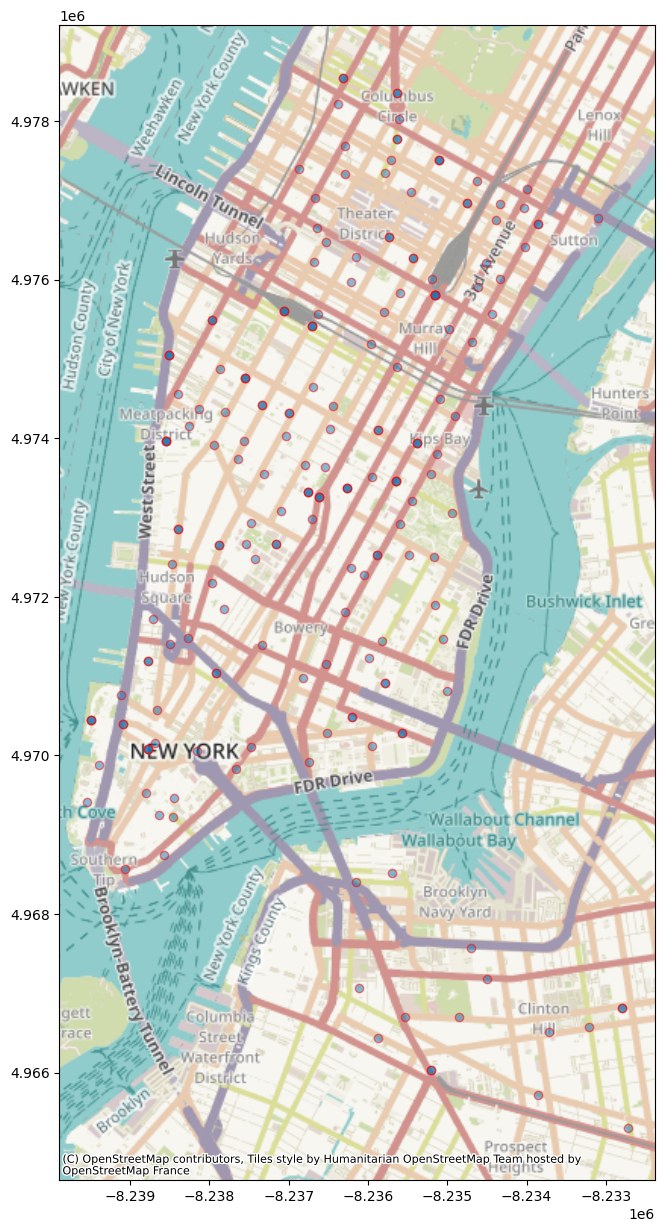

In [18]:
neigh_wm = gdf_2013.iloc[:100].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, edgecolor="r")
contextily.add_basemap(ax, zoom=13)

plt.show()

In [19]:
# remote version
"""
for year in years_previous:
    data_loaded = load_dataset("kraina/nyc_bike", name=f"nyc_bike_{year}")
    df_year = data_loaded["train"].to_pandas()
"""

'\nfor year in years_previous:\n    data_loaded = load_dataset("kraina/nyc_bike", name=f"nyc_bike_{year}")\n    df_year = data_loaded["train"].to_pandas()\n'